In [1]:
import numpy as np
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Flatten, Convolution2D, Activation
from keras.layers import Dropout, MaxPooling2D
from tensorflow.keras.applications import ResNet50,Xception
import pickle
import os
import pydot
import pydotplus
import graphviz

In [30]:
training_data1=[]
path='C:/Users/Manohar Vemuri/Desktop/M/project/K_Test'
for img in os.listdir(path):
            try:
                img_array=cv.imread(os.path.join(path,img))
                new_array=cv.resize(img_array,(128,128))
                training_data1.append(new_array)
            except Exception as e:
                pass

In [31]:
def median_blur(img):
    mb = cv.medianBlur(img, 1)
    res=hist(mb)
    return res
    
def hist(img):
    res = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gamma_corrected = np.array(255*(res / 255) ** 2.5, dtype = 'uint8')
    thres=thresholding_img(gamma_corrected)
    return thres

def thresholding_img(img):
    ret, thresh1 = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
    return thresh1

processed_img=[]
for img in training_data1:
    res=median_blur(img)
    processed_img.append(res)
    
processed_img=np.array(processed_img)

In [2]:
from keras.models import load_model 
#model = keras.models.load_model('C:/Users/Manohar Vemuri/Desktop/M/project')
model=load_model('my_model.h5')

In [33]:
ypred=model.predict(processed_img)

In [3]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 128, 128, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 128, 128, 1),
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
   

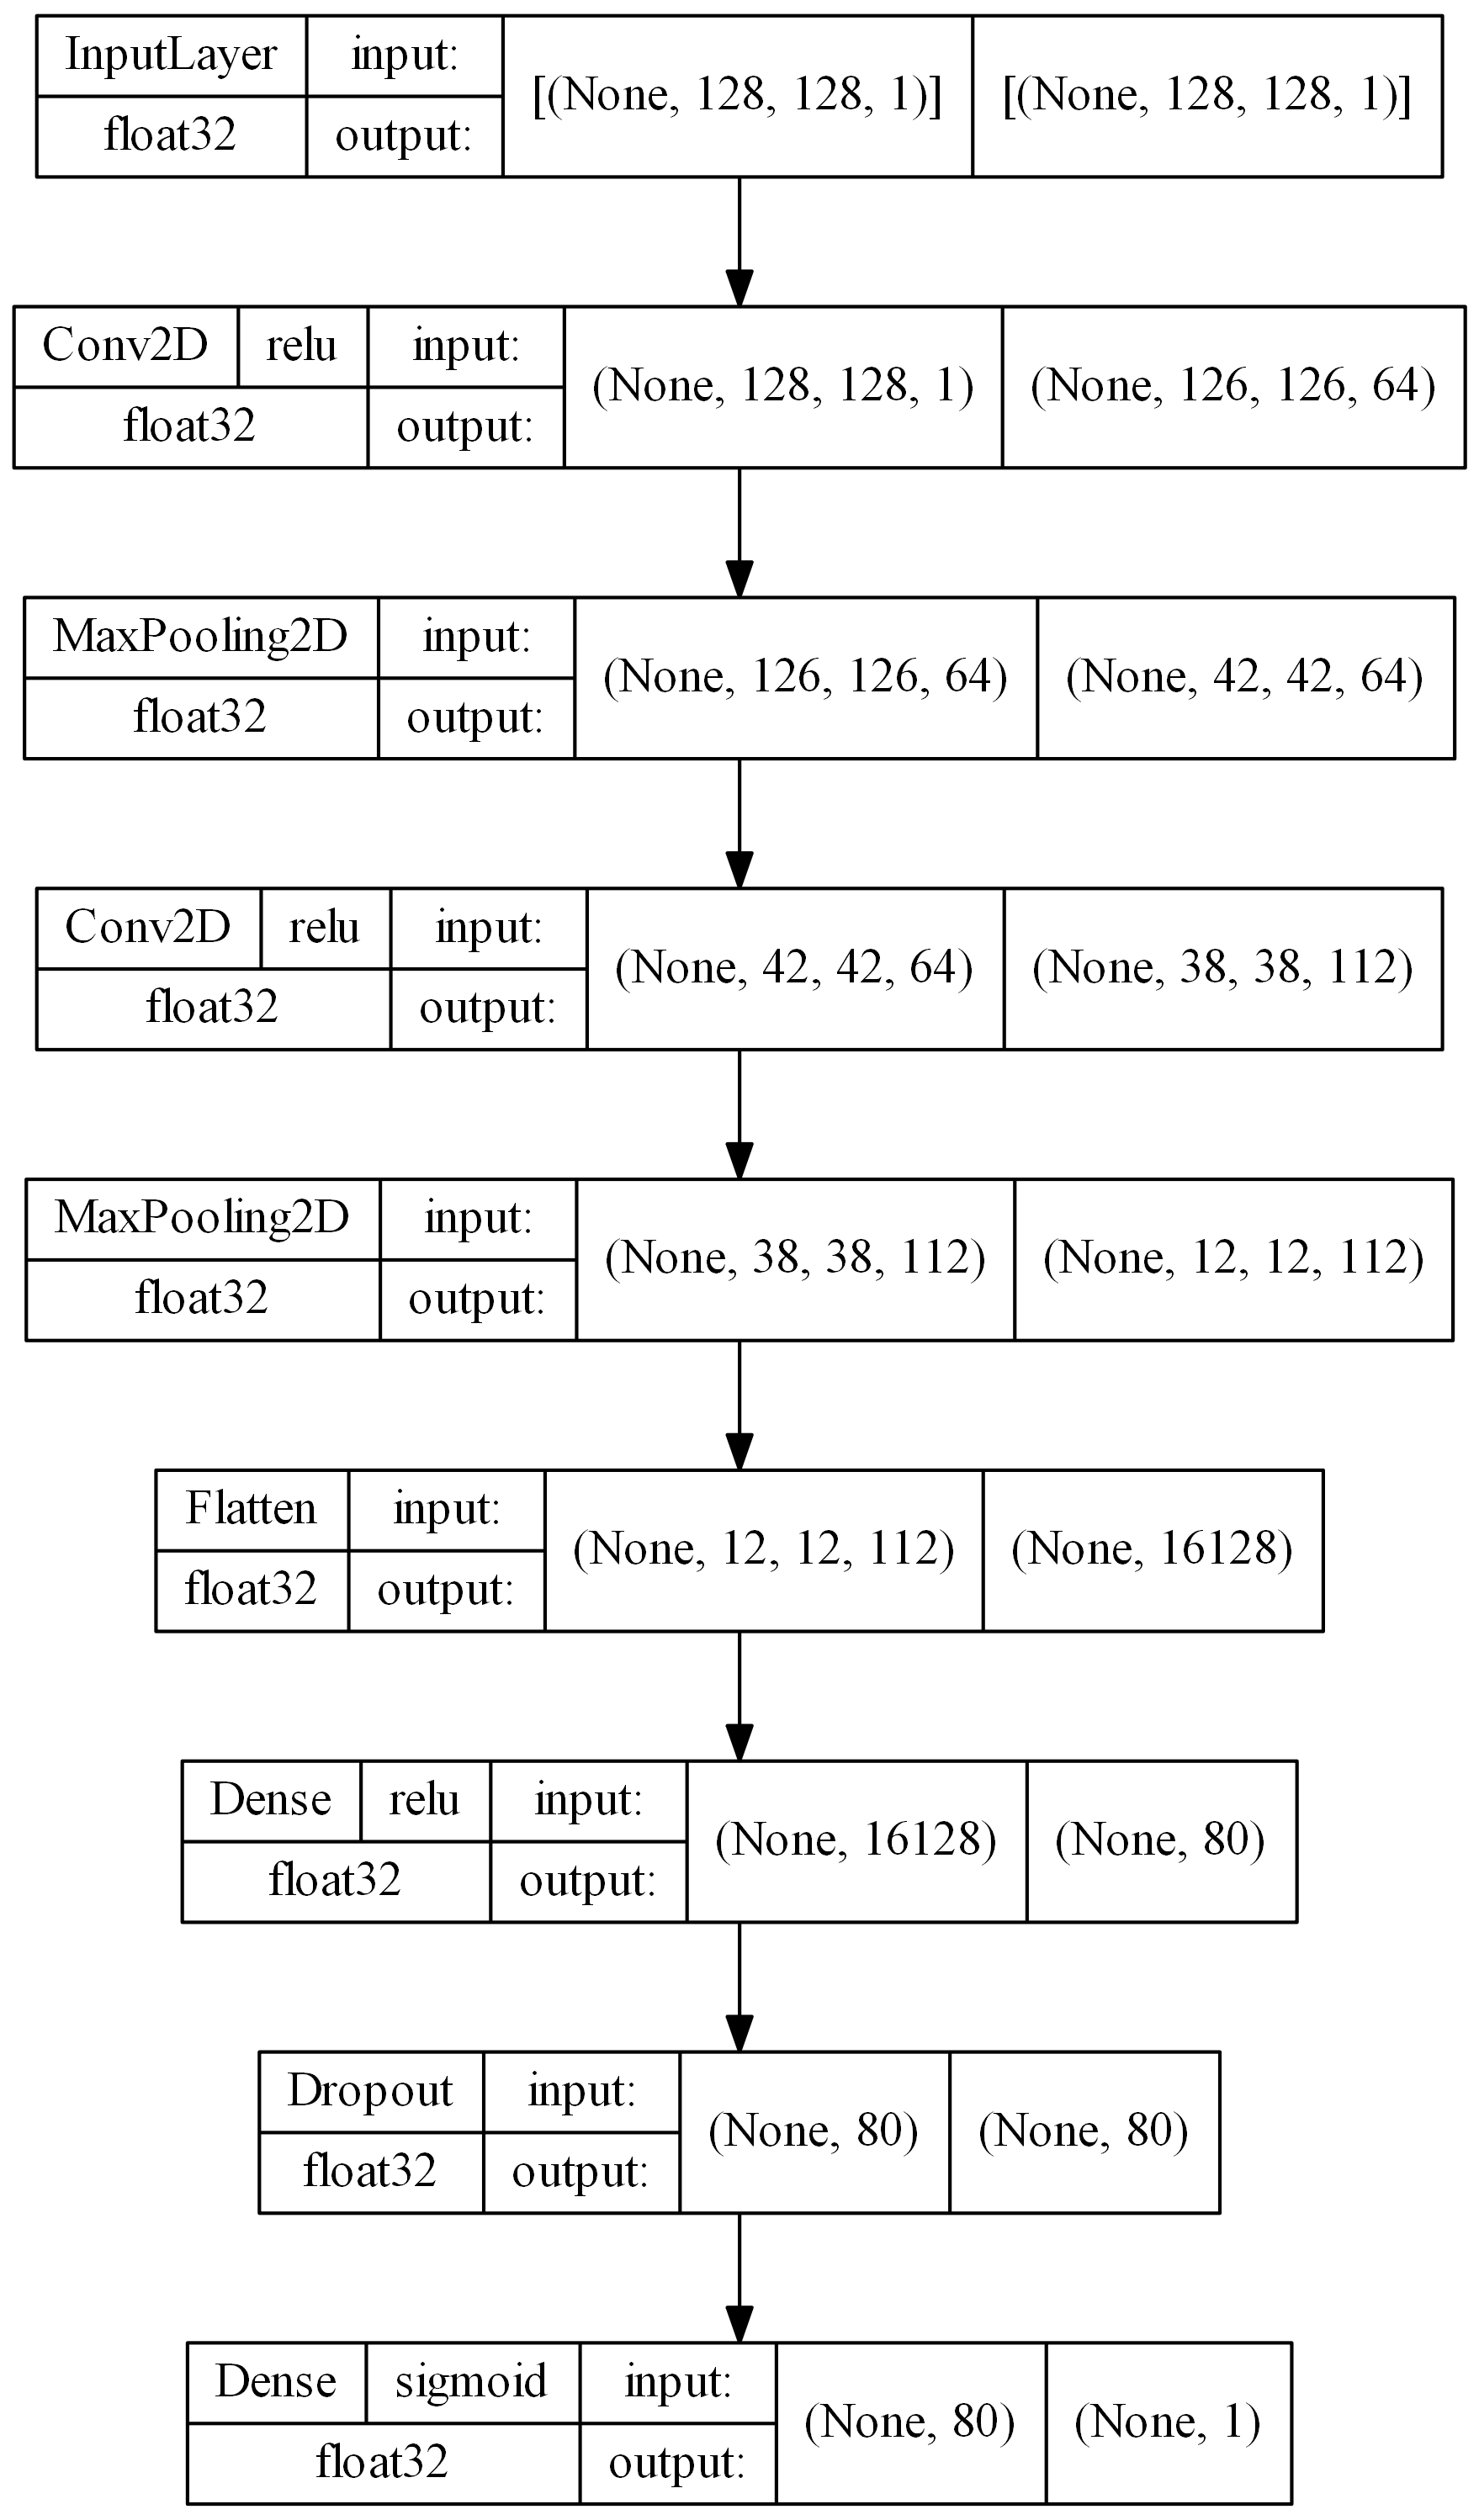

In [3]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=True,
    dpi=300,
    layer_range=None,
    show_layer_activations=True,
)

In [29]:
tf.keras.utils.model_to_dot(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    subgraph=True,
    layer_range=None,
    show_layer_activations=False,
)

Kidney Stone Detected


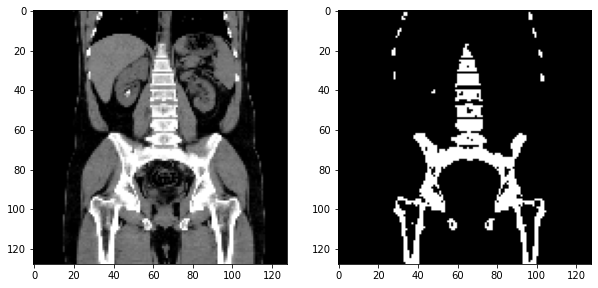

Normal


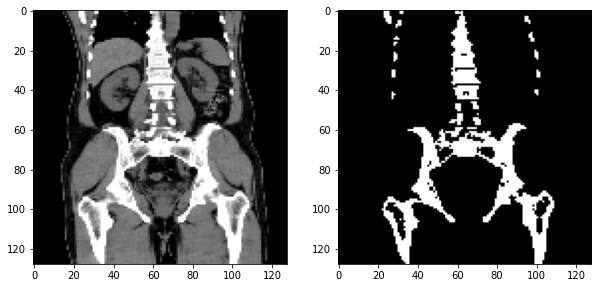

Normal


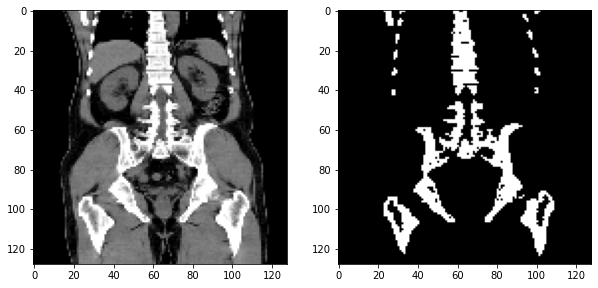

Normal


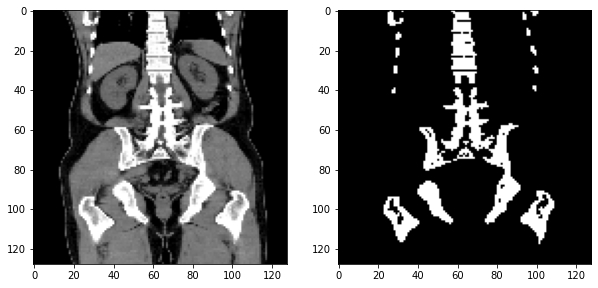

Normal


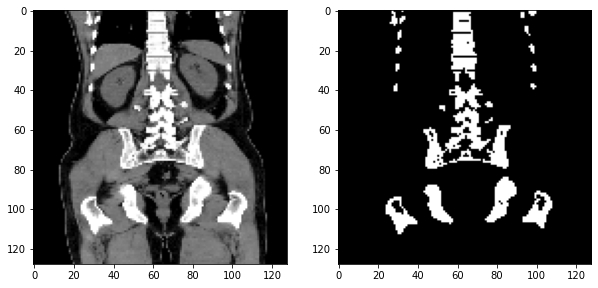

Kidney Stone Detected


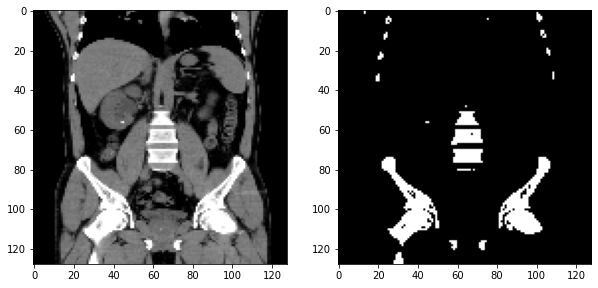

Kidney Stone Detected


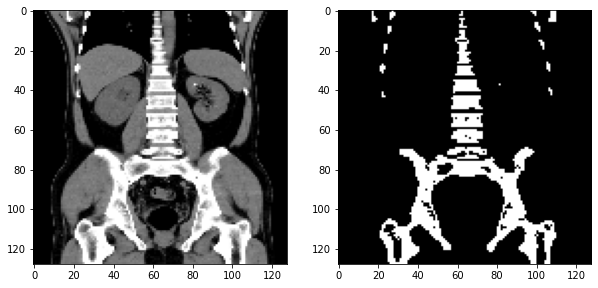

Kidney Stone Detected


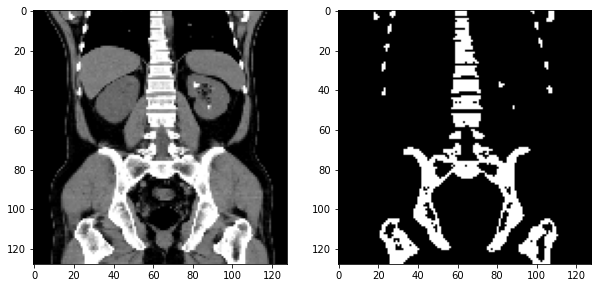

Kidney Stone Detected


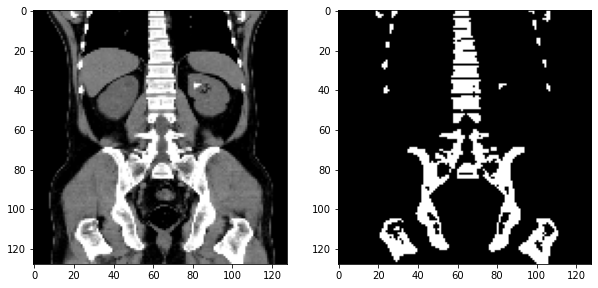

Kidney Stone Detected


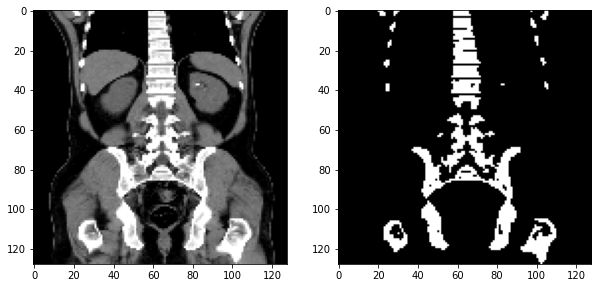

Kidney Stone Detected


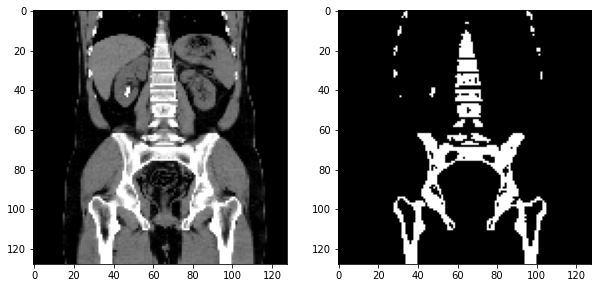

Kidney Stone Detected


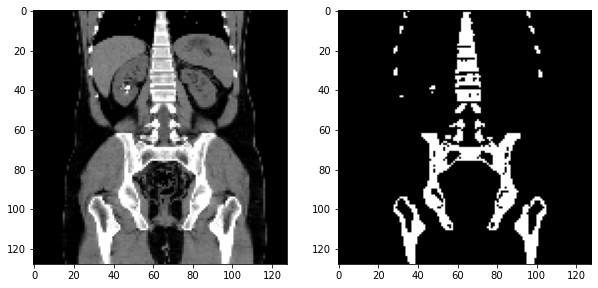

Kidney Stone Detected


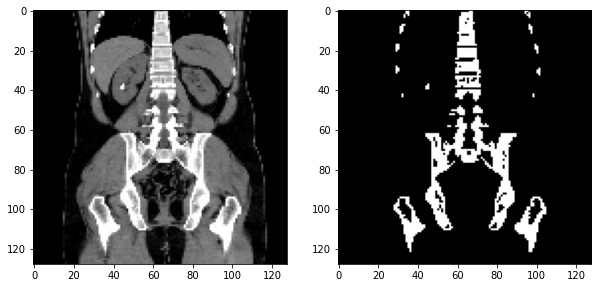

Kidney Stone Detected


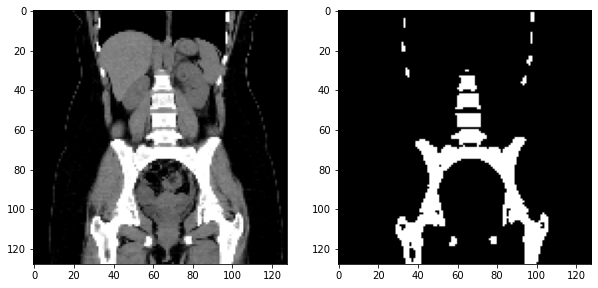

Normal


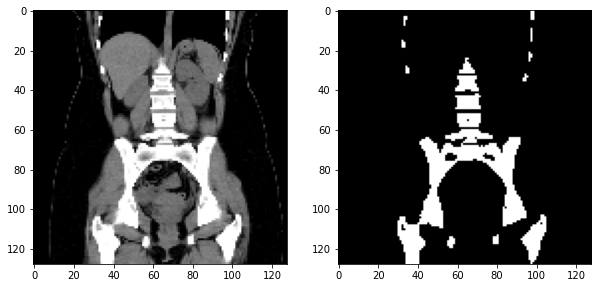

Normal


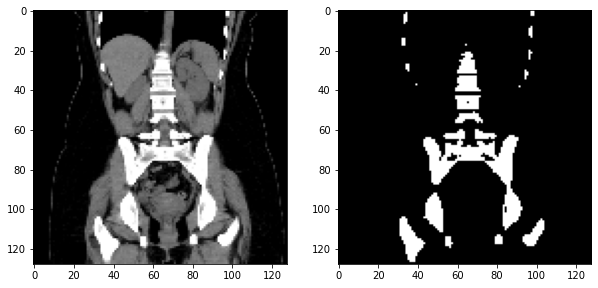

Normal


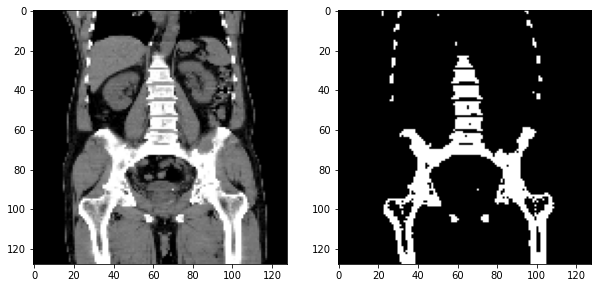

Normal


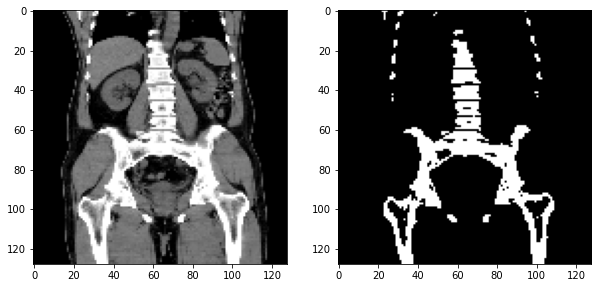

In [6]:
x = 1
for i in range(len(processed_img)):
    if((ypred[[i]]>0.75)*1):
        print('Kidney Stone Detected')
    else:
        print('Normal')
    plt.figure(figsize=(10,128))
    plt.subplot(len(processed_img),2,x)
    x+=1
    plt.imshow(training_data1[i],cmap='gray')
    plt.subplot(len(processed_img),2,x)
    x+=1
    plt.imshow(processed_img[i],cmap='gray')
    plt.show()

In [18]:
img_array=cv.imread('pp.png')
new_array=cv.resize(img_array,(128,128))

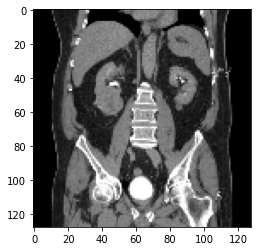

In [19]:
plt.imshow(new_array,cmap='gray')

In [20]:
res=median_blur(new_array)

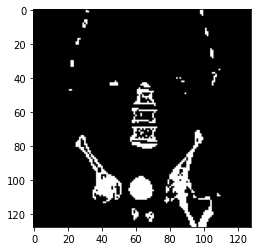

In [21]:
plt.imshow(res,cmap='gray')

In [22]:
ypred=model.predict(res.reshape(-1,128,128))
ypred

array([[1.]], dtype=float32)

Kidney Stone Detected


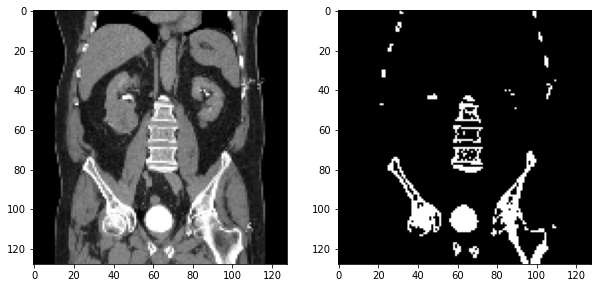

In [23]:

if((ypred>0.75)*1):
    print('Kidney Stone Detected')
else:
    print('Normal')
plt.figure(figsize=(10,128))
plt.subplot(1,2,1)
plt.imshow(new_array,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [86]:
mm=np.array([[83,1],[2,75]])

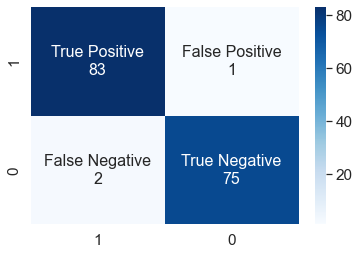

In [111]:
import seaborn as sns
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ['{0:0.0f}'.format(value) for value in mm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.4)
sns.heatmap(mm, annot=labels, fmt='',annot_kws={"size": 16},cmap='Blues',xticklabels=[1,0],yticklabels=[1,0],)
plt.show()

In [112]:
?sns.heatmap

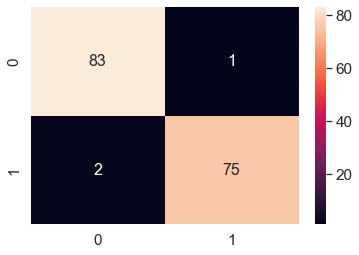

In [76]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[83,1],[2,75]]

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

array([[83,  1],
       [ 2, 75]])